<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/%E4%B8%89%E6%9C%88%E4%BA%8C%E5%8D%81%E4%BA%94%E6%97%A5%E7%AD%86%E8%A8%984.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget=https://raw.githubusercontent.com/reogac/smart-home/master/sensor-data.csv

In [3]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# load the sensors data
sensor_data = pd.read_csv("/content/sample_data/california_housing_test.csv")
sensor_data[:5]

longitude  latitude  housing_median_age  ...  \
0    -122.05     37.37                27.0  ...   
1    -118.30     34.26                43.0  ...   
2    -117.81     33.78                27.0  ...   
3    -118.36     33.82                28.0  ...   
4    -119.67     36.33                19.0  ...   

   households  median_income  median_house_value  
0       606.0         6.6085            344700.0  
1       277.0         3.5990            176500.0  
2       495.0         5.7934            270500.0  
3        11.0         6.1359            330000.0  
4       237.0         2.9375             81700.0  

[5 rows x 9 columns]

In [10]:
# get the number of groups that this will create

grouped_by_sensor.ngroups

NameError: ignored

In [11]:
# a helper function to print the contents of the groups
def print_groups (group_object):
    # loop over all groups, printing the group name 
    # and group details
    for name, group in group_object:
        print (name)
        print (group[:5])

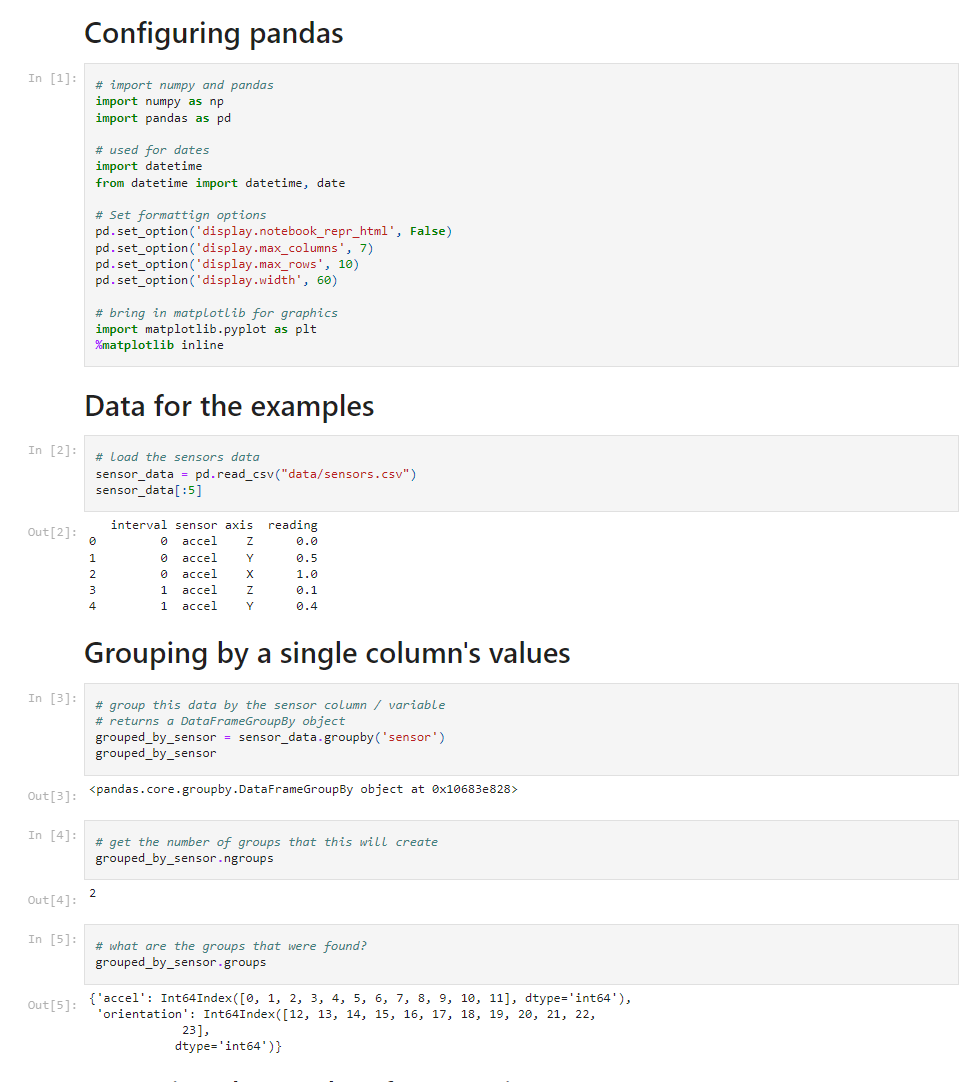

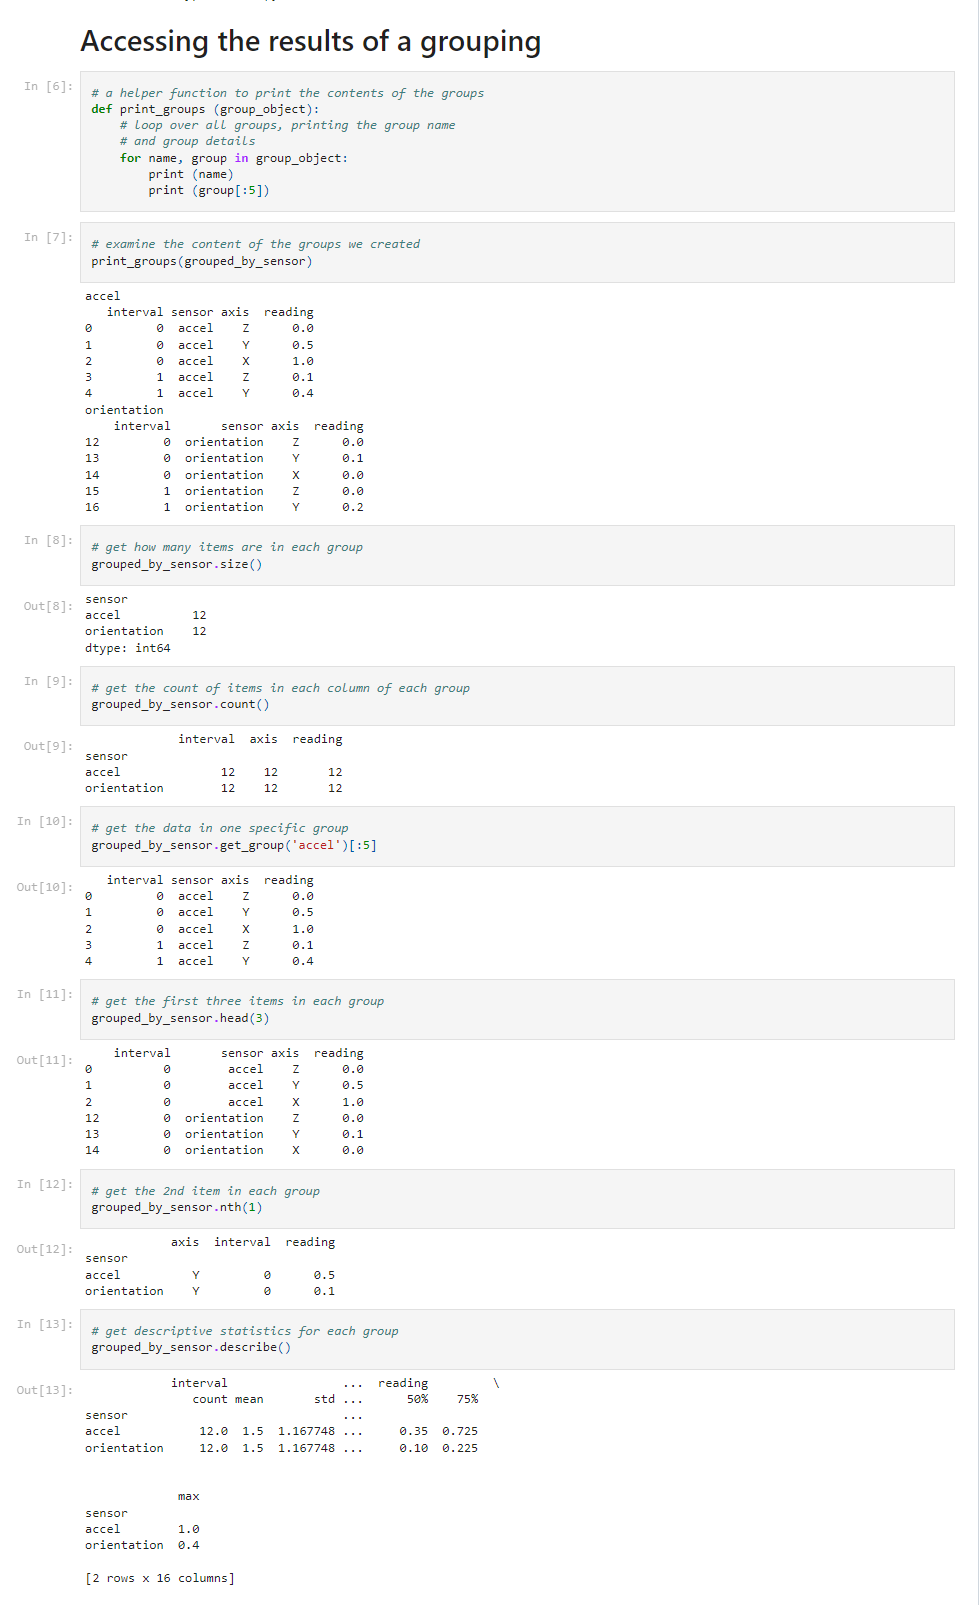

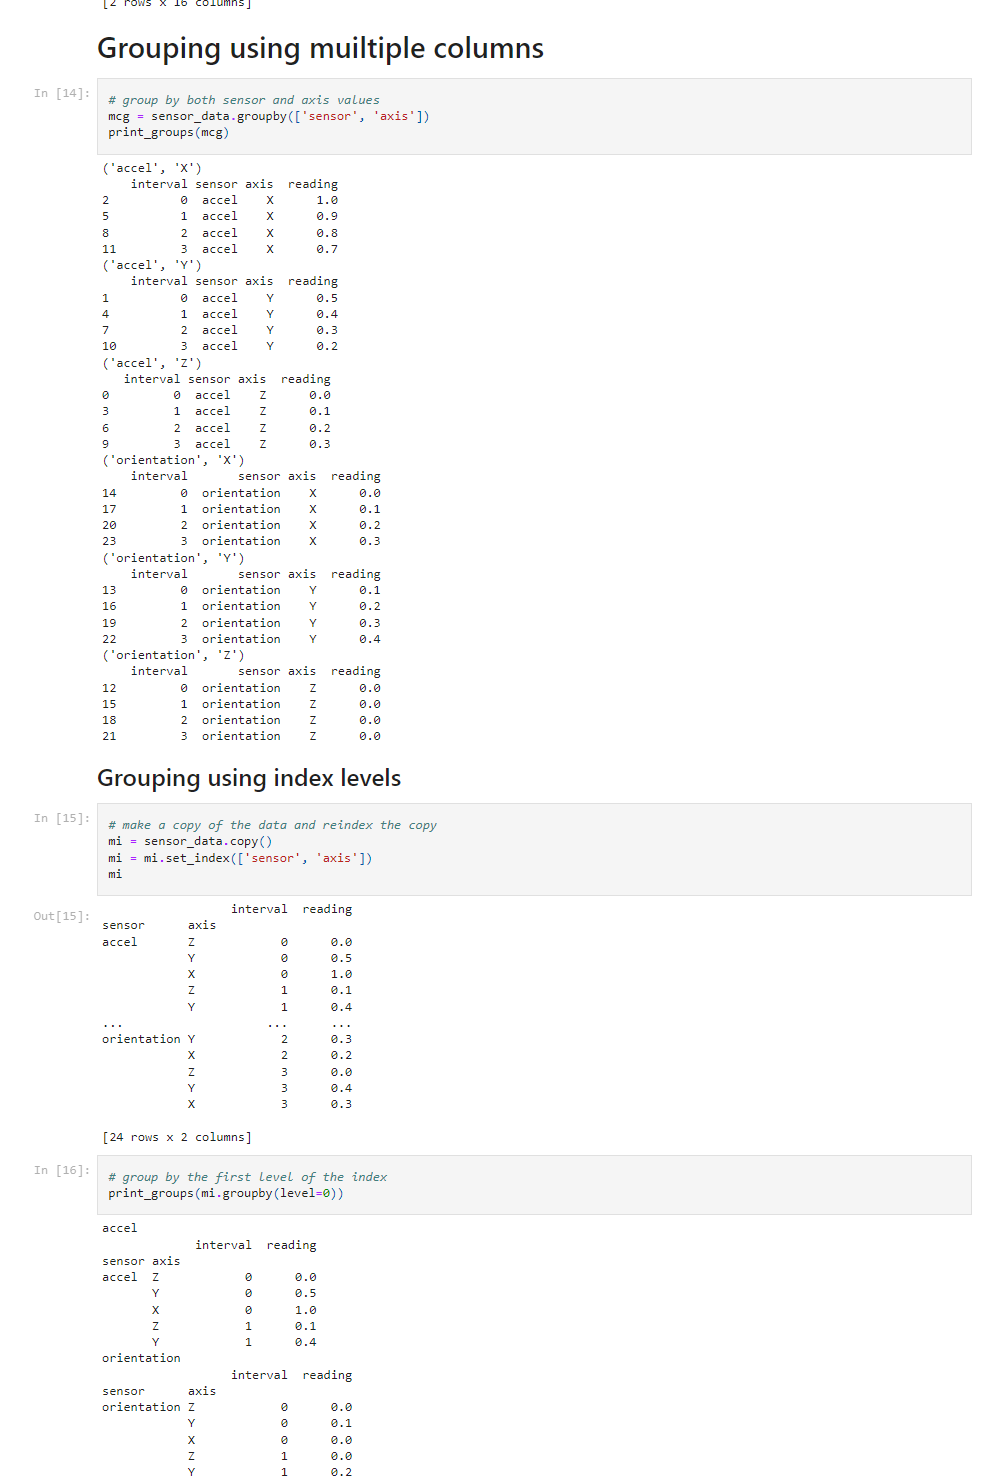

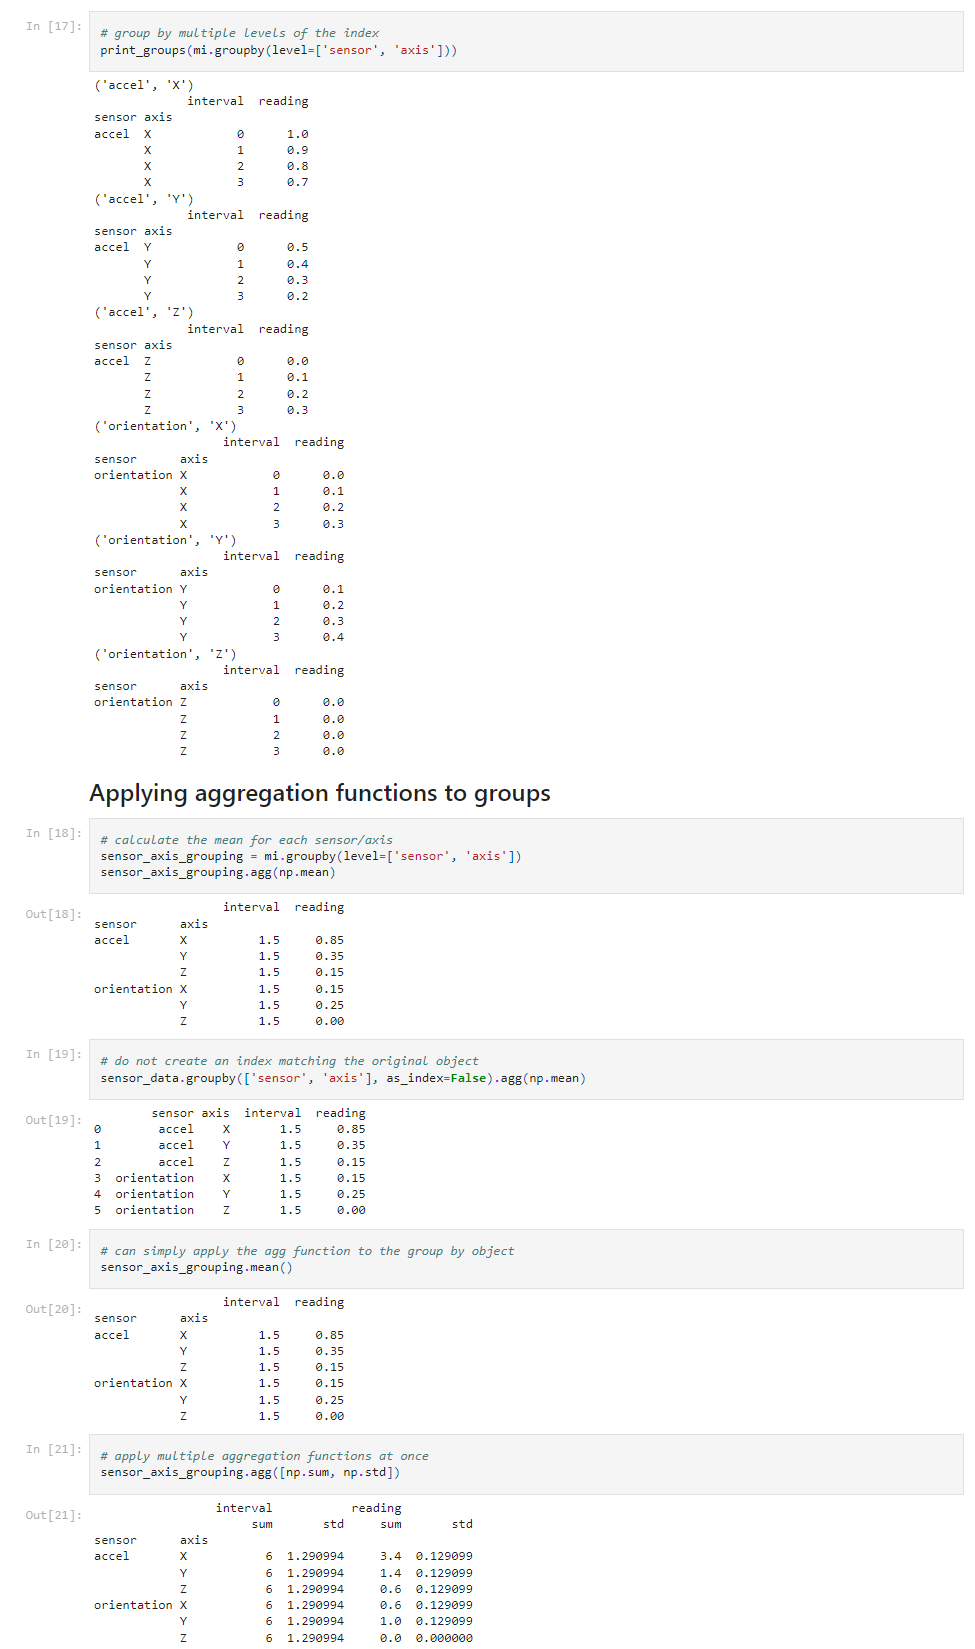

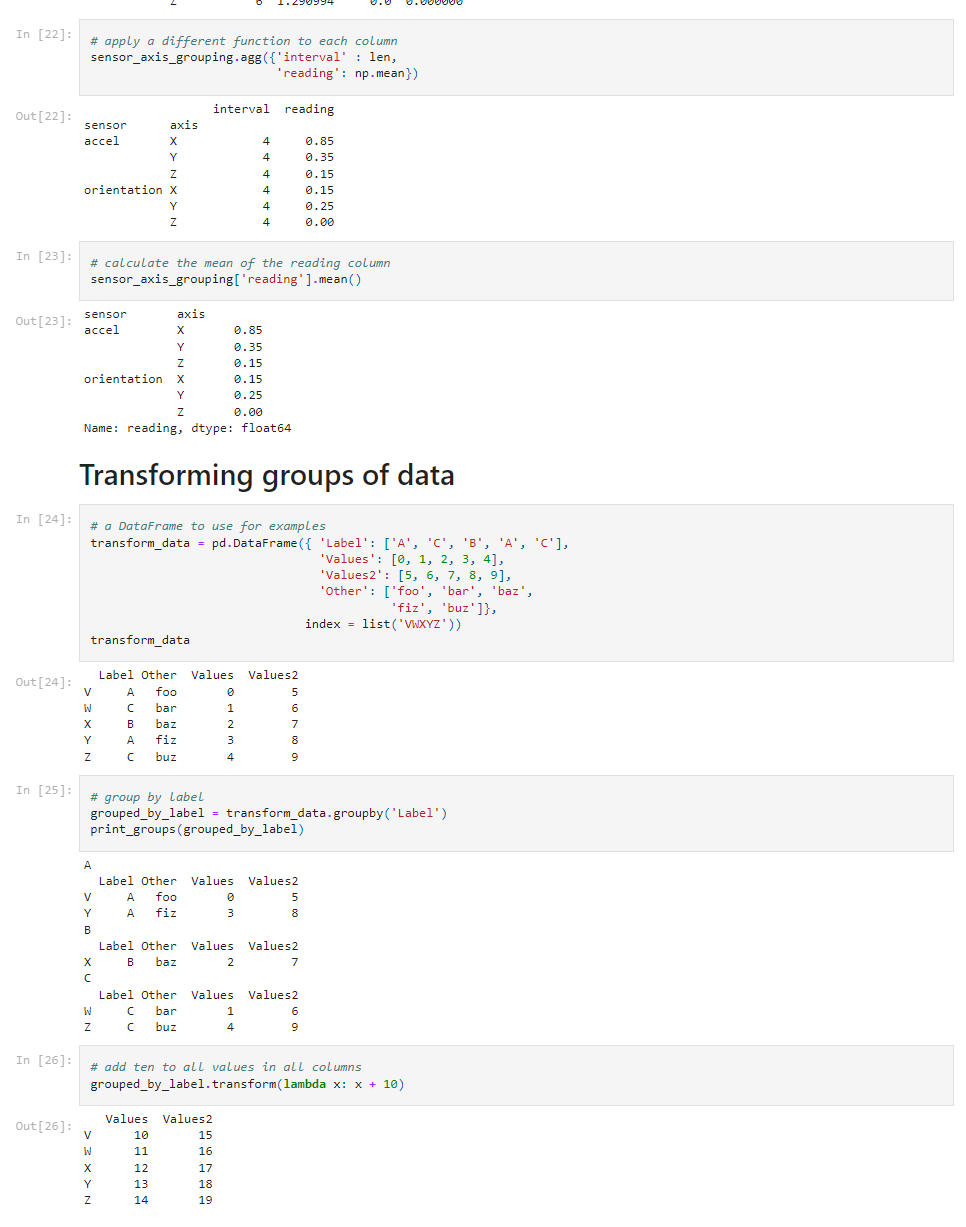

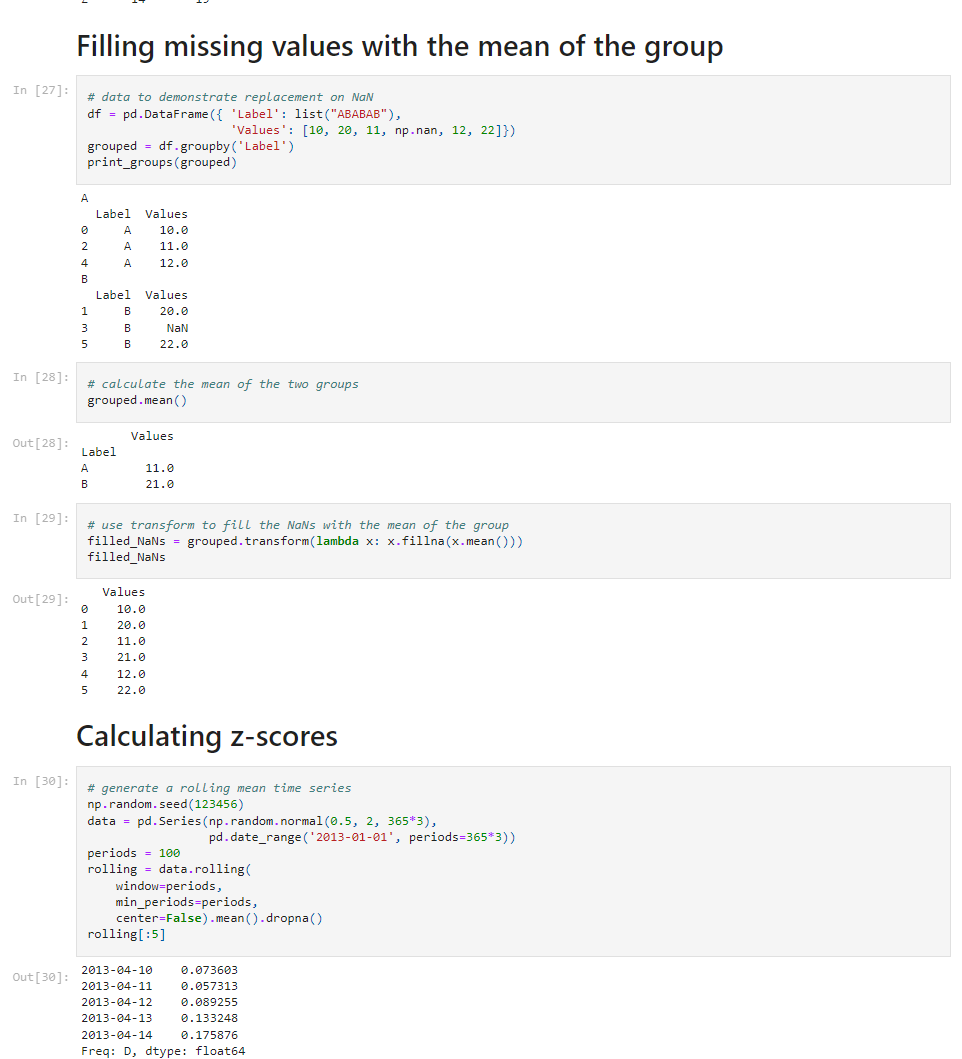

以上缺CSV表

# Calculating z-scores

In [13]:
# generate a rolling mean time series
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), 
                 pd.date_range('2013-01-01', periods=365*3))
periods = 100
rolling = data.rolling(
    window=periods,
    min_periods=periods,
    center=False).mean().dropna()
rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

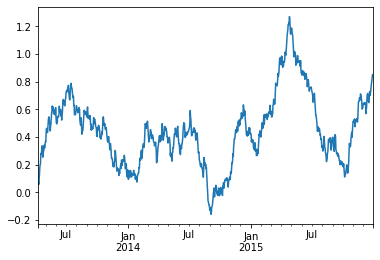

In [14]:
# visualize the series
rolling.plot();

In [15]:
# calculate mean and std by year
group_key = lambda x: x.year
groups = rolling.groupby(group_key)
groups.agg([np.mean, np.std])

mean       std
2013  0.454233  0.171988
2014  0.286502  0.182040
2015  0.599447  0.275786

In [16]:
# normalize to the z-score
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg([np.mean, np.std])

mean  std
2013  5.434250e-16  1.0
2014 -1.747156e-15  1.0
2015  7.239262e-16  1.0

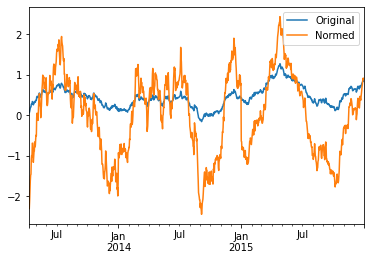

In [17]:
# plot original vs normalize
compared = pd.DataFrame({ 'Original': rolling,
                          'Normed': normed })
compared.plot();

# Filtering groups

In [19]:
# data for our examples
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     C     4.0
4     C     NaN
5     C     8.0

In [20]:
# drop groups with one or fewer non-NaN values
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

Label  Values
0     A     1.0
1     A     2.0
3     C     4.0
4     C     NaN
5     C     8.0

In [21]:
# drop any groups with NaN values
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

Label  Values
0     A     1.0
1     A     2.0
2     B     3.0

In [22]:
# select groups with a mean of 2.0 or greater 
grouped = df.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

Label  Values
3     C     4.0
4     C     NaN
5     C     8.0

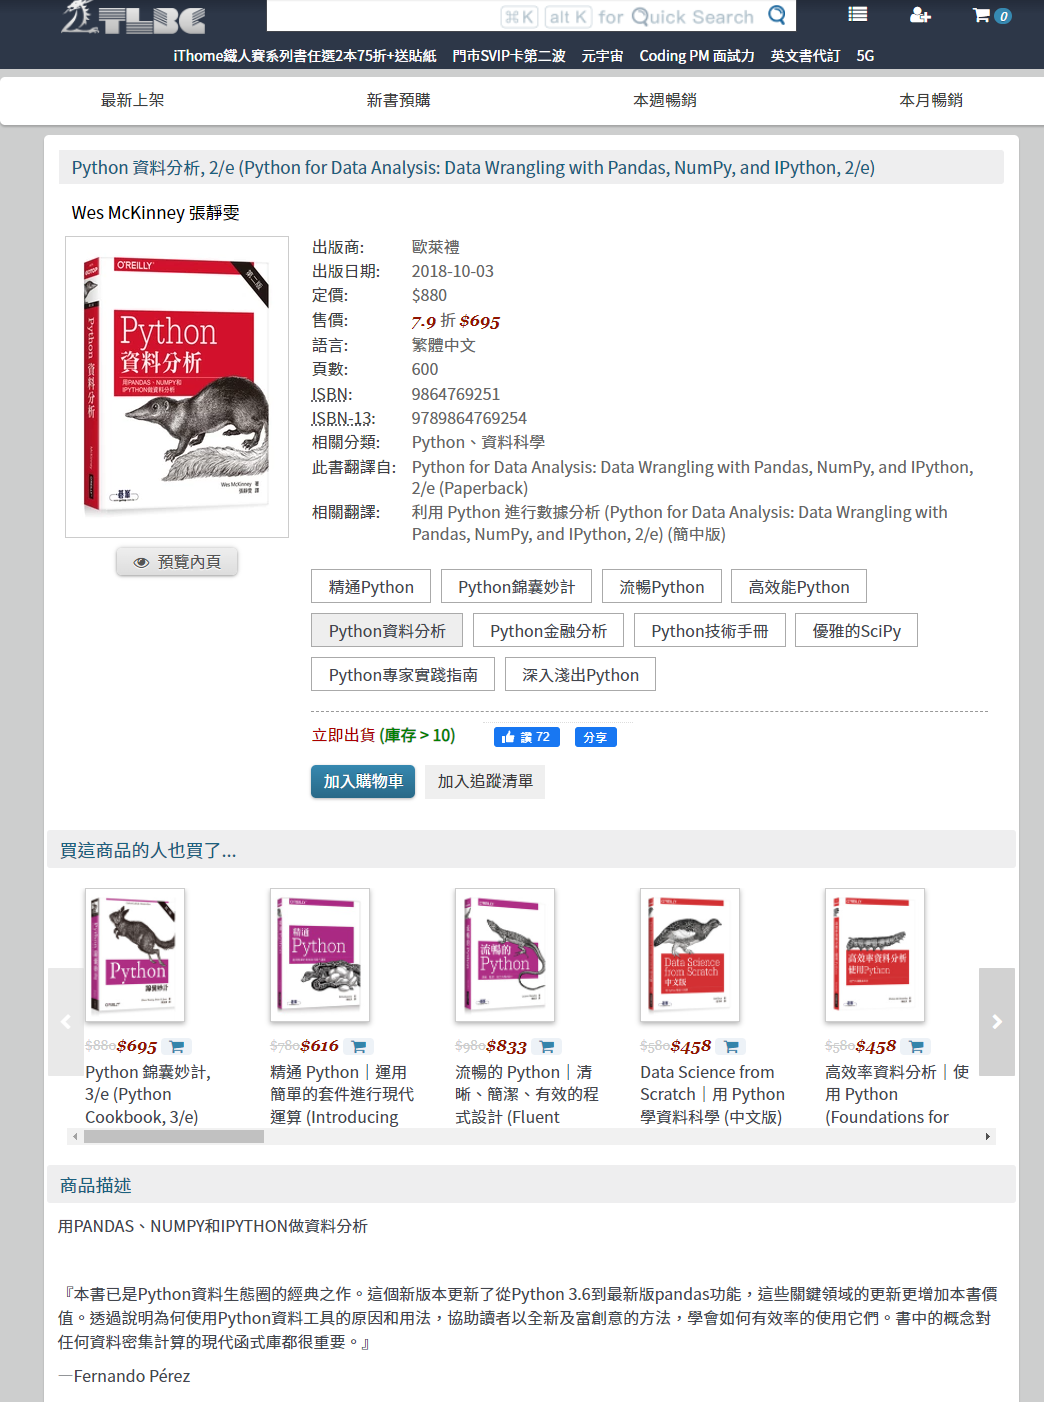

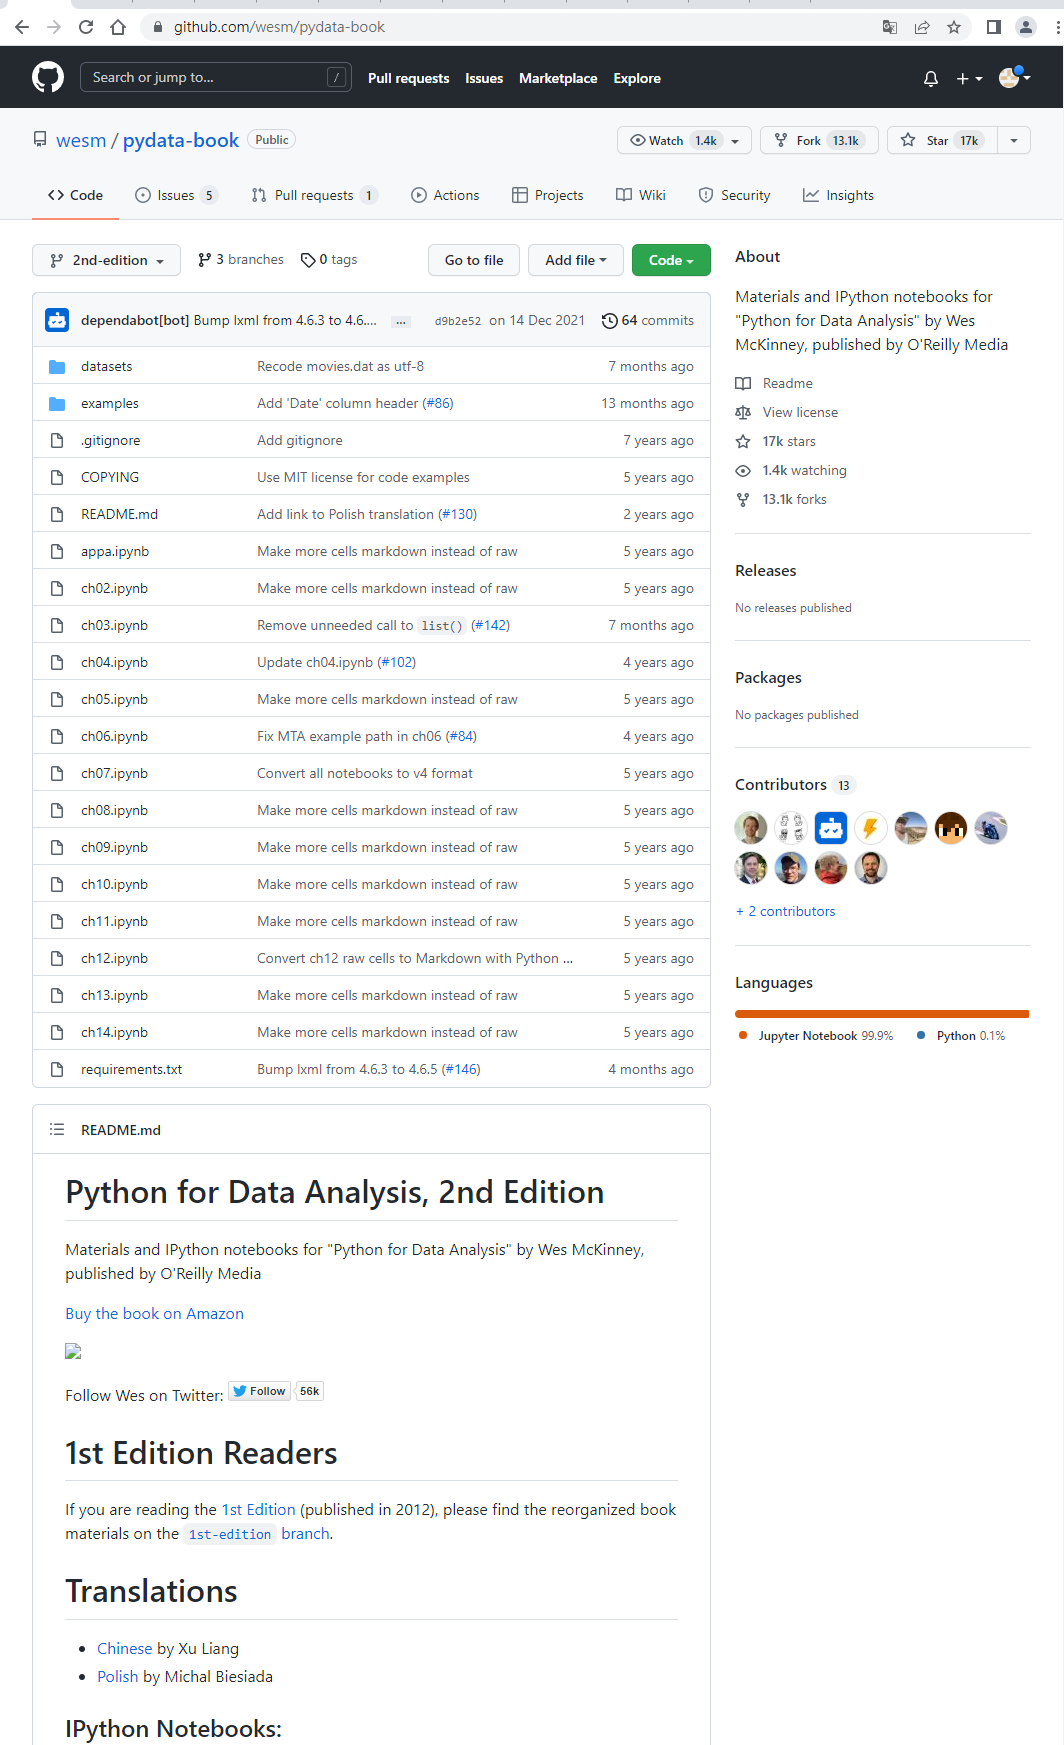

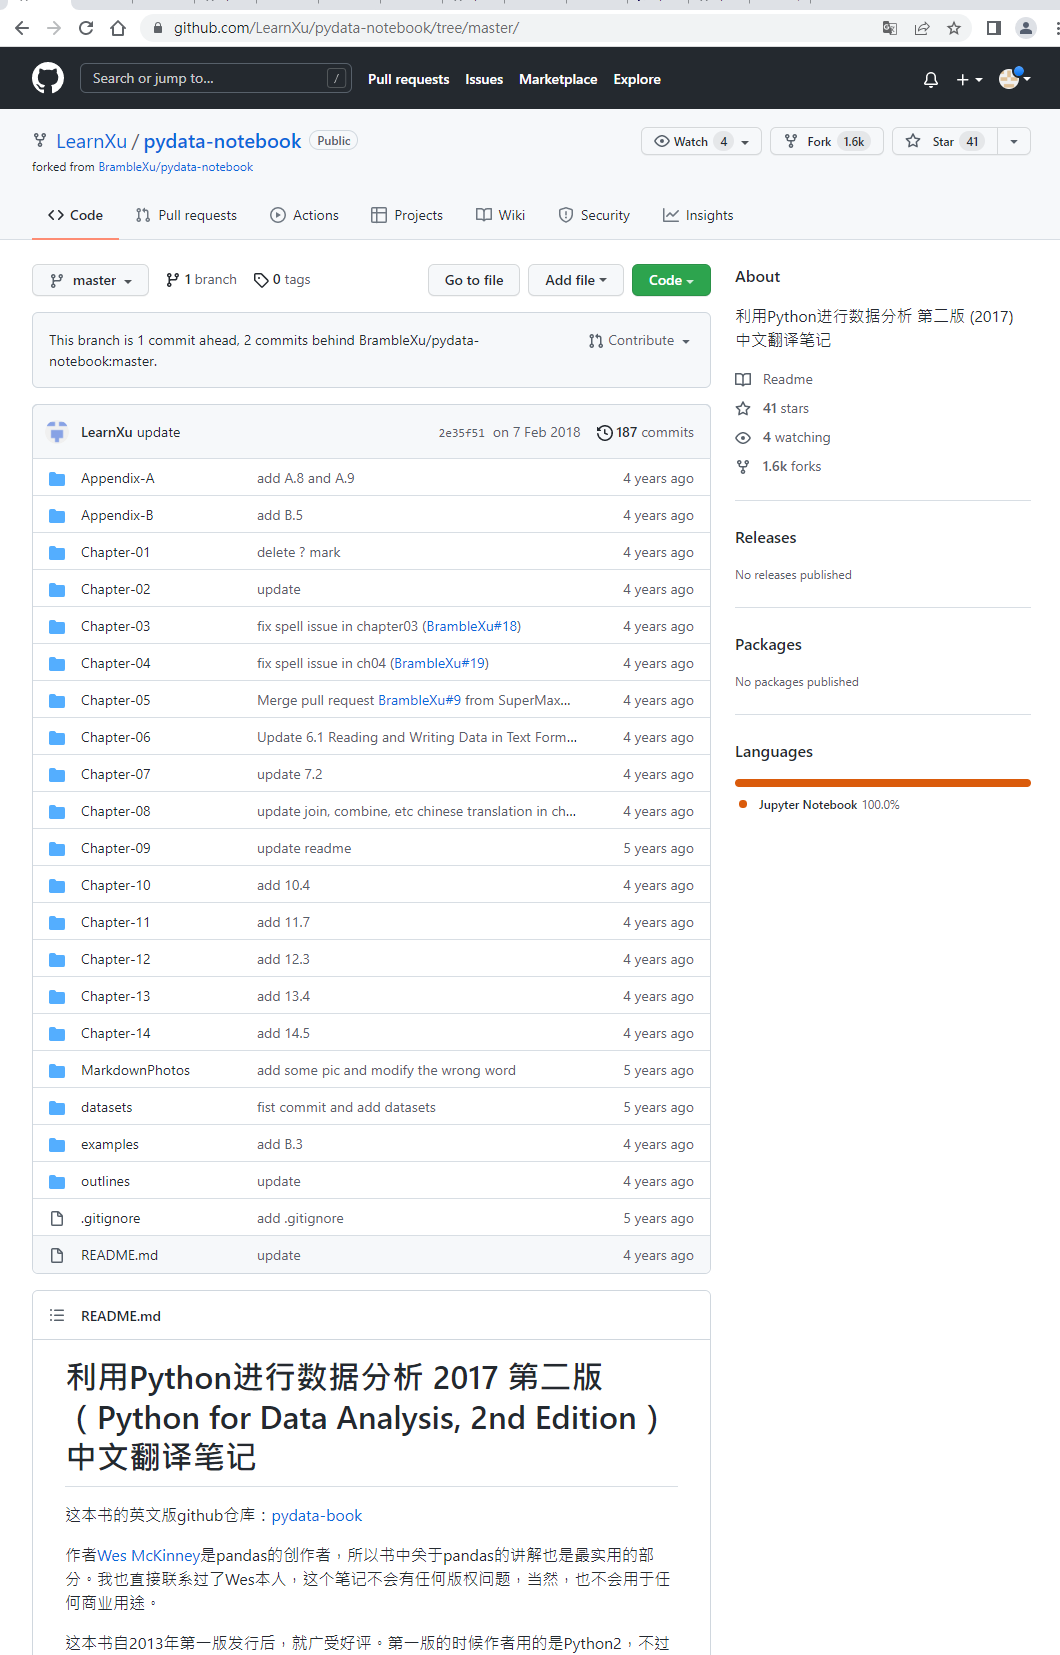